# Best Classification

In [6]:
#Importing the libraries to watch the 'fits' image and get the data array
import astropy
#import plotly.graph_objects as go
from astropy.io import fits
#Importing a library that is useful to read the original file
import pandas as pd
import pylab as plb
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp
#Importing a visual library with some illustrative set up
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors 
from matplotlib import cm
import numpy as np
from sklearn.utils.testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.decomposition import PCA
import math 
import seaborn as sns
from sklearn.linear_model import LogisticRegression
plt.style.use('fivethirtyeight')
plt.rcParams['font.family'] = 'sans-serif' 
plt.rcParams['font.serif'] = 'Ubuntu' 
plt.rcParams['font.monospace'] = 'Ubuntu Mono' 
plt.rcParams['font.size'] = 14 
plt.rcParams['axes.labelsize'] = 12 
plt.rcParams['axes.labelweight'] = 'bold' 
plt.rcParams['axes.titlesize'] = 12 
plt.rcParams['xtick.labelsize'] = 12 
plt.rcParams['ytick.labelsize'] = 12 
#plt.rcParams['legend.fontsize'] = 12 
plt.rcParams['figure.titlesize'] = 12 
plt.rcParams['image.cmap'] = 'jet' 
plt.rcParams['image.interpolation'] = 'none' 
plt.rcParams['figure.figsize'] = (16, 8) 
plt.rcParams['lines.linewidth'] = 2 
plt.rcParams['lines.markersize'] = 8
plt.rcParams["axes.grid"] = False



In [4]:
#Importing the dataset and displaying the first 5 rows
data=pd.read_csv('star.txt',sep='\s+')

In [6]:
data.head()

,#ID,X,Y,F606W,error,F814W,error.1,Chi,Sharp
0,8,4462.947,140.859,28.197,0.1036,27.127,0.1068,6.106,0.7310
1,120,5002.486,186.138,20.843,0.0552,19.815,0.0661,10.690,0.4000
2,165,5003.574,195.421,27.014,0.2194,26.068,0.1349,10.651,0.1940
3,226,4448.493,207.417,30.193,0.3641,28.270,0.1636,4.059,-1.9585
4,351,5040.717,224.366,28.935,0.1669,28.941,0.2464,4.274,-0.7720


In [7]:
#Dropping the Sharp and the #ID from the dataset
notar=data.drop(columns=['Sharp','#ID'])

# P.C.A. Excluding Space

In [6]:
#Dropping the X and the Y to perform PCA
notar=data.drop(columns=['X','Y'])

In [9]:
notar.head()

,F606W,error,F814W,error.1,Chi
0,28.197,0.1036,27.127,0.1068,6.106
1,20.843,0.0552,19.815,0.0661,10.690
2,27.014,0.2194,26.068,0.1349,10.651
3,30.193,0.3641,28.270,0.1636,4.059
4,28.935,0.1669,28.941,0.2464,4.274


In [7]:
#Performing the P.C.A.
pca=PCA(n_components=3)
pca=pca.fit(notar)
pca_data=pd.DataFrame(pca.transform(notar))

In [8]:
pca_data=pca_data.rename(columns={0:'FirstComponent',1:'SecondComponent',2:'ThirdComponent'})

In [57]:
pca_data['X']=data.X
pca_data['Y']=data.Y

In [58]:
pca_data['Sharp']=data.Sharp

In [59]:
pca_data.head()

,FirstComponent,SecondComponent,ThirdComponent,X,Y,Sharp
0,-3.348246,3.558359,0.052565,4462.947,140.859,0.7310
1,6.885136,8.439184,0.189286,5002.486,186.138,0.4000
2,-1.896787,8.148357,0.145220,5003.574,195.421,0.1940
3,-5.504066,1.449171,-0.564914,4448.493,207.417,-1.9585
4,-5.110070,1.678896,0.804773,5040.717,224.366,-0.7720


In [60]:
#pca_data=pca_data.drop(columns=['Sharp'])

# Best method 2 features 3 classes

In [59]:
#Two features, three classes preprocessing
opt_data=pca_data[['FirstComponent','SecondComponent']]

In [60]:
data['SharpSign']=data.Sharp.apply(np.sign)
opt_data['Target']=data['SharpSign']

<ipython-input-60-9563ede527cc>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



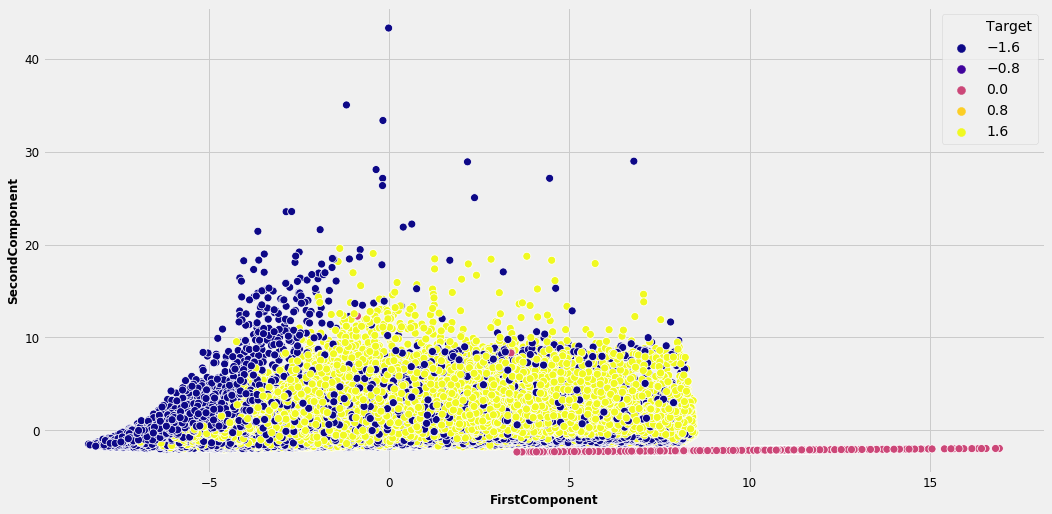

In [14]:
#plotting the First two component, together with the target
sns.scatterplot(opt_data.FirstComponent,opt_data.SecondComponent,hue=opt_data.Target,palette='plasma')
plt.grid(True)

In [63]:
#Dataset and target 
X=opt_data.drop(columns=['Target'])
y=opt_data.Target

In [20]:
#Importing the SVM and the train test split 
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [62]:
# (Train+validation)/ test split at 90%
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.9, random_state=42)

In [18]:
# Train/Validation split at 50%
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.5, random_state=42)

In [19]:
K_LIST=['linear', 'poly', 'rbf', 'sigmoid']

In [20]:
#Validation on kernels 
BEST_KERNEL=[]
k=0
for i in range(5):
    FIN_SCORE=[]
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.9, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(
        X_train, y_train, test_size=0.5, random_state=42)
    for ker in K_LIST:
        clf=SVC(kernel=ker)
        clf.fit(X_train,y_train)
        fin_score=clf.score(X_val,y_val)
        FIN_SCORE.append(fin_score)
        k=k+1
        print(ker + ' Kernel has been explored')
    FIN_SCORE=np.array(FIN_SCORE)
    
    BEST_KERNEL.append(K_LIST[FIN_SCORE.argmax()])
    print('Cross validation ' + str(i) + ' out of 4 \n')

linear Kernel has been explored
poly Kernel has been explored
rbf Kernel has been explored
sigmoid Kernel has been explored
Cross validation 0 out of 4 

linear Kernel has been explored
poly Kernel has been explored
rbf Kernel has been explored
sigmoid Kernel has been explored
Cross validation 1 out of 4 

linear Kernel has been explored
poly Kernel has been explored
rbf Kernel has been explored
sigmoid Kernel has been explored
Cross validation 2 out of 4 

linear Kernel has been explored
poly Kernel has been explored
rbf Kernel has been explored
sigmoid Kernel has been explored
Cross validation 3 out of 4 

linear Kernel has been explored
poly Kernel has been explored
rbf Kernel has been explored
sigmoid Kernel has been explored
Cross validation 4 out of 4 



In [7]:
BEST_KERNEL=['rbf','rbf','rbf','rbf','rbf']

Text(0.5, 0, 'Chosen Kernel')

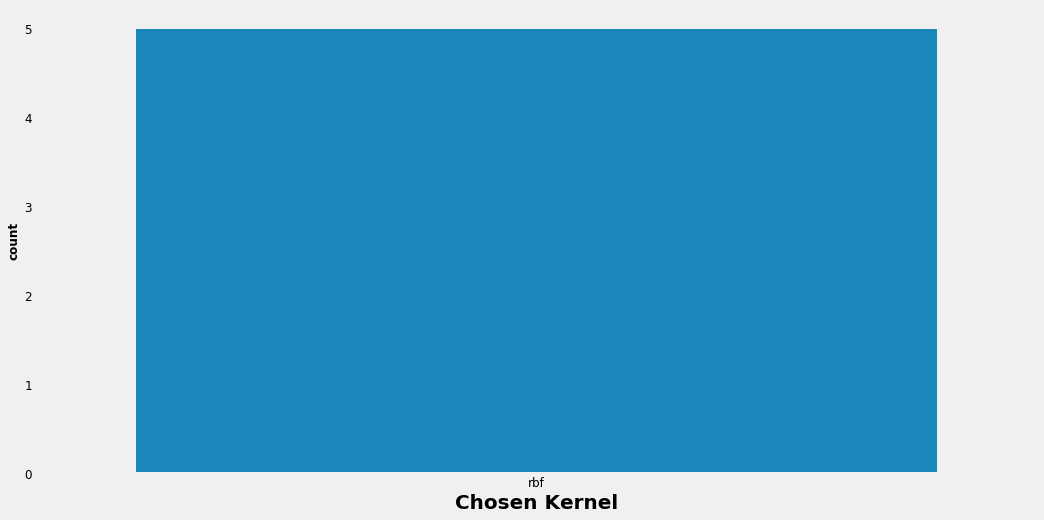

In [9]:
sns.countplot(BEST_KERNEL)
plt.xlabel('Chosen Kernel',fontsize=20)

In [22]:
best_kernel='rbf'

In [23]:
#Validation on C values 
c_list=np.arange(0.5,50.5,0.5)
k=0
PERC=['20%','40%','60%','80%','100%']
K=[20,40,60,80,100]
BEST_C=[]
for i in range(5):
    FIN_SCORE=[]
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.9, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(
        X_train, y_train, test_size=0.5, random_state=42)
    k=0
    for c in c_list:
        k=k+1
        clf=SVC(C=c,kernel=best_kernel)
        clf.fit(X_train,y_train)
        fin_score=clf.score(X_val,y_val)
        FIN_SCORE.append(fin_score)
        #k=k+1
        if k in K:
            ind=K.index(k)
            print (PERC[ind] + ' of the C values has been explored')
    FIN_SCORE=np.array(FIN_SCORE)
    BEST_C.append(c_list[FIN_SCORE.argmax()])
    print('Cross validation ' + str(i) + ' out of 4 \n')

20% of the C values has been explored
40% of the C values has been explored
60% of the C values has been explored
80% of the C values has been explored
100% of the C values has been explored
Cross validation 0 out of 4 

20% of the C values has been explored
40% of the C values has been explored
60% of the C values has been explored
80% of the C values has been explored
100% of the C values has been explored
Cross validation 1 out of 4 

20% of the C values has been explored
40% of the C values has been explored
60% of the C values has been explored
80% of the C values has been explored
100% of the C values has been explored
Cross validation 2 out of 4 

20% of the C values has been explored
40% of the C values has been explored
60% of the C values has been explored
80% of the C values has been explored
100% of the C values has been explored
Cross validation 3 out of 4 

20% of the C values has been explored
40% of the C values has been explored
60% of the C values has been explored
80

Text(0, 0.5, 'Count')

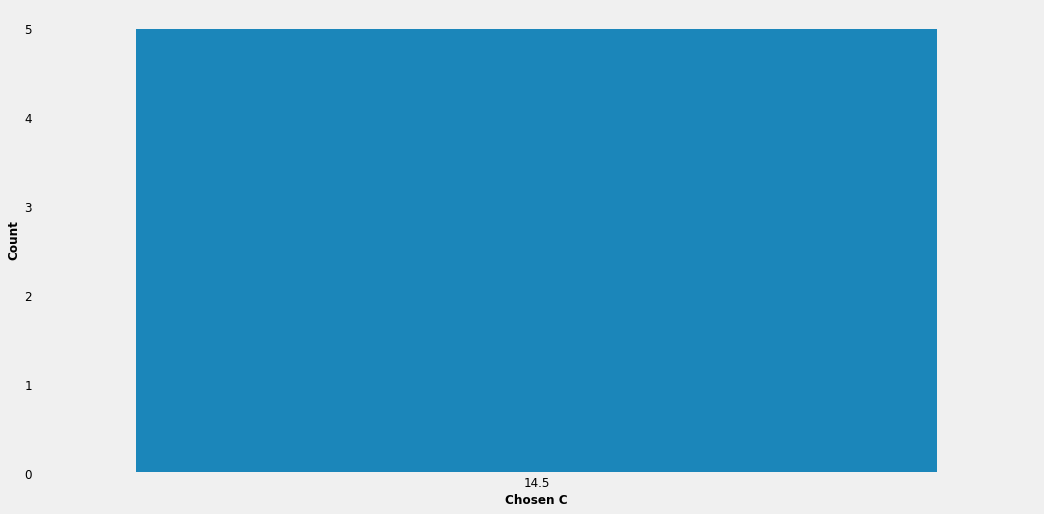

In [24]:
sns.countplot(BEST_C)
plt.xlabel('Chosen C')
plt.ylabel('Count')

In [25]:
FIN_SCORE=np.array(FIN_SCORE)

In [15]:
#Best parameters 
best_c=14.5
best_kernel='rbf'

In [64]:
#Train/Test rigid split 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.7, random_state=42)

In [65]:
#Fit with the best parameters 
clf=SVC(kernel=best_kernel,C=best_c)
clf.fit(X_train,y_train)
fin_score=clf.score(X_test,y_test)

In [66]:
prediction=clf.predict(X_test)

In [67]:
#Results 
print('The final score with 2 feature is ' + str(fin_score*100) +'% ')

The final score with 2 feature is 71.05672105672106% 


In [68]:
#Target/prediction comparison 
pred_data=X_test.copy()
pred_data['Target']=y_test
pred_data['Prediction']=prediction

In [34]:
#plotting the decision surfaces
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
def make_meshgrid(x, y, h=.4):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

In [32]:
#renaming
y=y_test

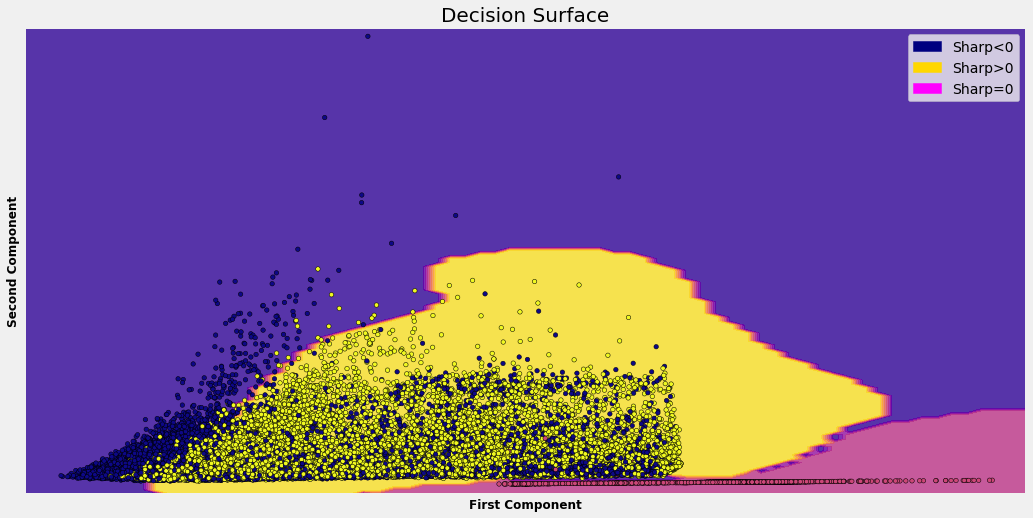

In [35]:
fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of linear SVC ')
# Set-up grid for plotting.
X0, X1 = X_test['FirstComponent'], X_test['SecondComponent']
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf, xx, yy, cmap='plasma', alpha=0.8)
ax.scatter(X0, X1, c=y, cmap='plasma', s=20, edgecolors='k')
ax.set_ylabel('Second Component')
ax.set_xlabel('First Component')


violet_patch = mpatches.Patch(color='navy', label='Sharp<0')
yellow_patch = mpatches.Patch(color='gold', label='Sharp>0')
pink_patch = mpatches.Patch(color='magenta', label='Sharp=0')

plt.legend(handles=[violet_patch,yellow_patch,pink_patch])

ax.set_xticks(())
ax.set_yticks(())
ax.set_title('Decision Surface', fontsize=20)
#ax.legend()
plt.show()

In [36]:
test_data=pred_data

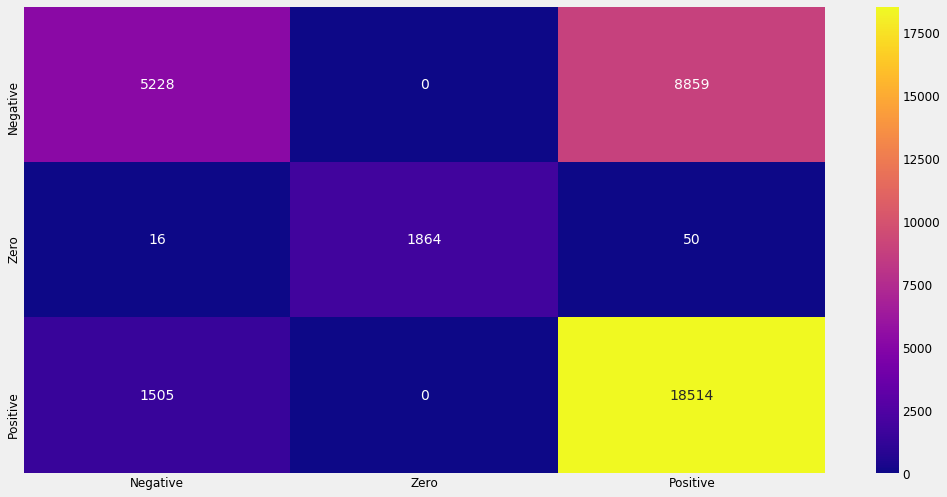

In [37]:
#Confusion matrix 
import itertools
from string import ascii_uppercase
from sklearn.metrics import confusion_matrix

y_test=test_data.Target
predic = prediction

columns = ['Negative','Zero','Positive']

confm = confusion_matrix(y_test, predic)
df_cm = pd.DataFrame(confm.astype(float), index=columns, columns=columns)

ax = sns.heatmap(df_cm, cmap='plasma',annot=True,fmt='g')

In [103]:
#Defining precision and recall for three classes classification
def precision(confusion,clas):
    if clas=='Negative':
        TP=confusion[0][0]
        FN=confusion[1][0]+confusion[2][0]
        pres=TP/(TP+FN)
    if clas=='Positive':
        TP=confusion[2][2]
        FN=confusion[2][0]+confusion[2][1]
        pres=TP/(TP+FN)
    if clas=='Zero':
        TP=confusion[1][1]
        FN=confusion[1][0]+confusion[1][2]
        pres=TP/(TP+FN)
    return pres

In [104]:
def recal(confusion,clas):
    if clas=='Negative':
        TP=confusion[0][0]
        FP=confusion[0][1]+confusion[0][2]
        rec=TP/(TP+FP)
    if clas=='Positive':
        TP=confusion[2][2]
        FP=confusion[0][2]+confusion[1][2]
        rec=TP/(TP+FP)
    if clas=='Zero':
        TP=confusion[1][1]
        FP=confusion[0][1]+confusion[2][1]
        rec=TP/(TP+FP)
    return rec

In [41]:
precision(confm,'Negative'),precision(confm,'Positive'),precision(confm,'Zero')

(0.7746332790042969, 0.9248214196513312, 0.9658031088082901)

In [42]:
recal(confm,'Negative'),recal(confm,'Positive'),recal(confm,'Zero')

(0.3711223113508909, 0.6751267184480181, 1.0)

In [44]:
#Defining statistics summary
def statistics(confusion):
    neg=[precision(confm,'Negative'),recal(confm,'Negative')]
    pos=[precision(confm,'Positive'),recal(confm,'Positive')]
    zero=[precision(confm,'Zero'),recal(confm,'Zero')]
    stats=pd.DataFrame({'Negative':neg,'Positive':pos,'Zero':zero})
    stats.index=['Precision','Recall']
    return stats

In [45]:
statistics(confm)

,Negative,Positive,Zero
Precision,0.774633,0.924821,0.965803
Recall,0.371122,0.675127,1.000000


# Best Method 

In [70]:
#On the yellow data, where the algorithm performs poorly, a Random Forest algorithm is applied
wrong_data=pred_data[pred_data['Prediction']==1.0].drop(columns=['Target'])
wrong_target=pred_data[pred_data['Prediction']==1.0].Target

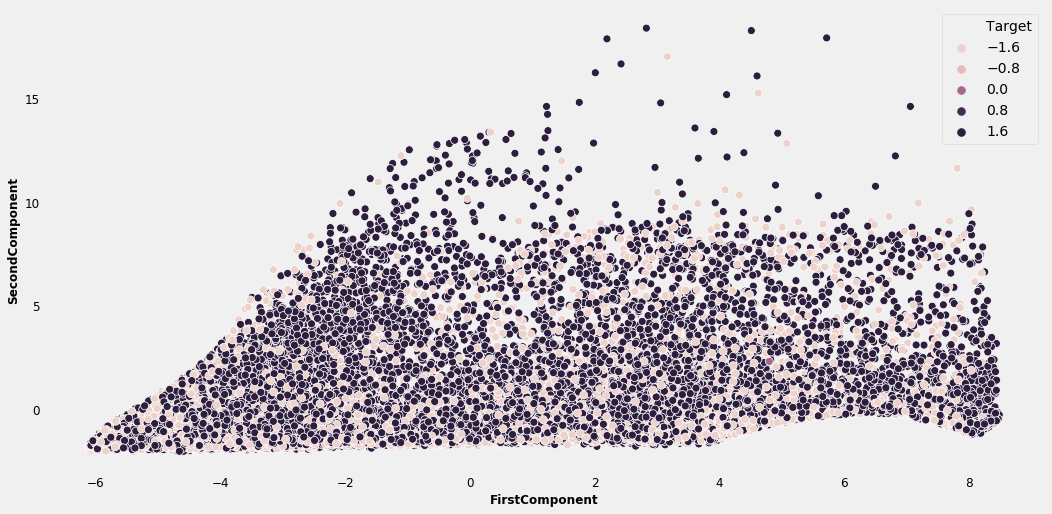

In [71]:
#Plotting the difficult to predict data points 
sns.scatterplot(wrong_data.FirstComponent,wrong_data.SecondComponent,hue=wrong_target)

In [72]:
#Implement random forest on a split set 
X=data.loc[X_test.index].drop(columns=['#ID','Sharp','SharpSign'])
y=data.loc[X_test.index].SharpSign
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [73]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

 

#Create a Gaussian Classifier
rf=RandomForestClassifier(n_estimators=500, min_samples_split = 20, max_features = 5)

 

# Train the model on training data
rf.fit(X_train, y_train)

RandomForestClassifier(max_features=5, min_samples_split=20, n_estimators=500)

No handles with labels found to put in legend.


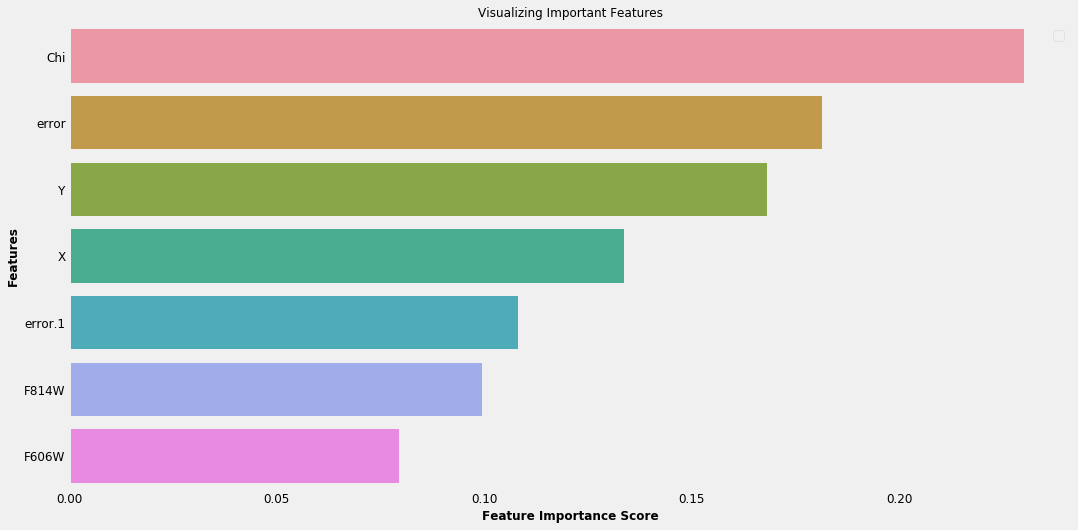

In [74]:
feature_names = ['X','Y','F606W','error','F814W','error.1','Chi']
# Creating a bar plot
feature_imp = pd.Series(rf.feature_importances_,index=feature_names).sort_values(ascending=False)
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()


In [75]:
#Collecting the results of the random forest on this middle area 
#And the SVM on the -1 and 0 points
#Combining the features for the Random Forest results
Results=X_test.copy()
Results['Target']=y_test
Results['Pred']=rf.predict(X_test)
Results['FirstComponent']=opt_data['FirstComponent'].loc[Results.index]
Results['SecondComponent']=opt_data['SecondComponent'].loc[Results.index]

In [76]:
#Doing the same for the SVM results
good_ones=pred_data[(pred_data.Prediction==0.) |(pred_data.Prediction==-1.0)]

In [79]:
for feat in feature_names:
    good_ones[feat]=data[feat].loc[good_ones.index]

<ipython-input-79-c452d75d6622>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [80]:
good_ones=good_ones.rename(columns={'Prediction':'Pred'})

In [81]:
#Building the total resume
Results=Results.append(good_ones)

In [82]:
#Computing accuracy
from sklearn.metrics import accuracy_score
acc=accuracy_score(Results.Pred, Results.Target)

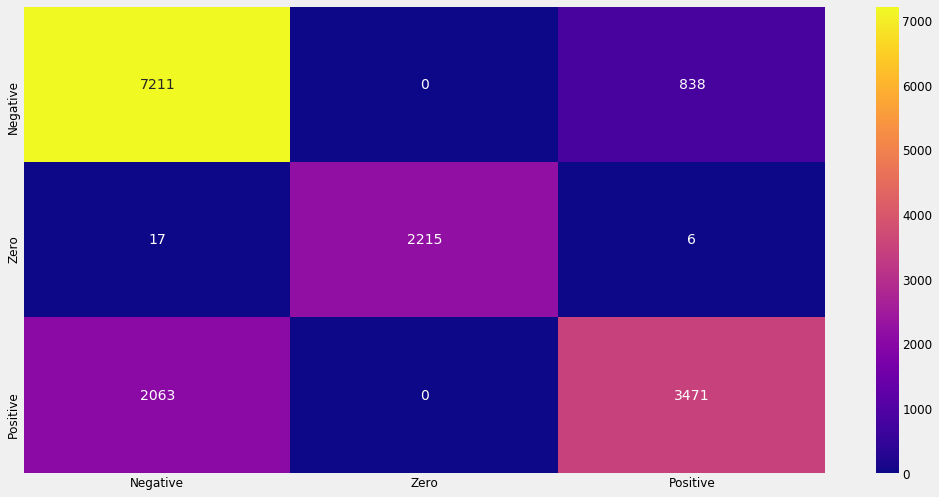

In [84]:
#Computing the confusion matrix
import itertools
from string import ascii_uppercase
from sklearn.metrics import confusion_matrix

y_test=Results.Target
predic = Results.Pred

columns = ['Negative','Zero','Positive']

confm = confusion_matrix(y_test, predic)
df_cm = pd.DataFrame(confm.astype(float), index=columns, columns=columns)

ax = sns.heatmap(df_cm, cmap='plasma',annot=True,fmt='g')

In [105]:
#Using the statistics function to see the precisions and the recall 
def statistics(confusion):
    neg=[precision(confm,'Negative'),recal(confm,'Negative')]
    pos=[precision(confm,'Positive'),recal(confm,'Positive')]
    zero=[precision(confm,'Zero'),recal(confm,'Zero')]
    stats=pd.DataFrame({'Negative':neg,'Positive':pos,'Zero':zero})
    stats.index=['Precision','Recall']
    return stats

In [106]:
statistics(confm)

,Negative,Positive,Zero
Precision,0.776127,0.627214,0.989723
Recall,0.895888,0.804403,1.000000


In [94]:
#Summary of all the methods 
Tot_res=pd.DataFrame({'Performance':[71,74,80,82]})
Tot_res.index=['SVM','Decision Tree','Random Forest','Ensemble Learning']
Tot_res

,Performance
SVM,71
Decision Tree,74
Random Forest,80
Ensemble Learning,82


ERROR! Session/line number was not unique in database. History logging moved to new session 1008


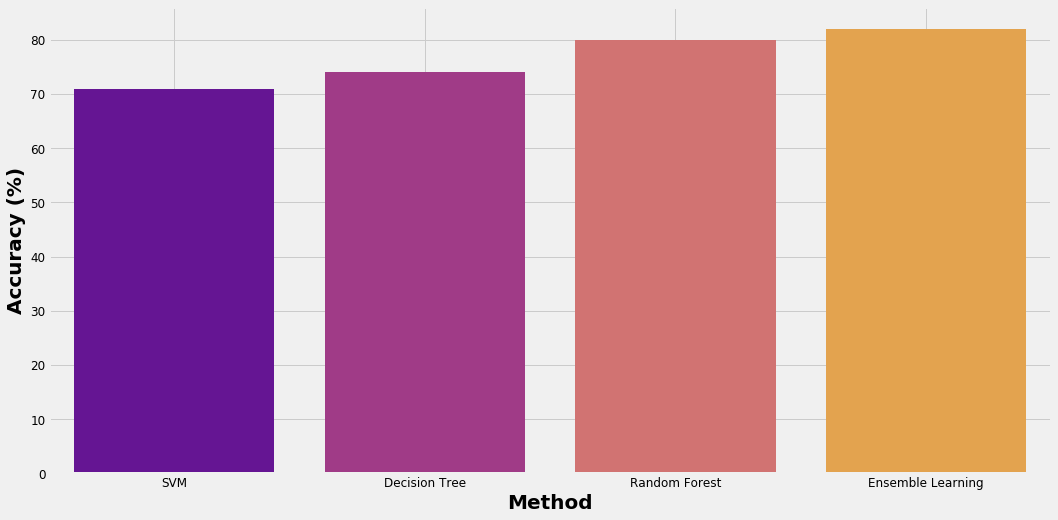

In [100]:
#Barplot of all the methods performances
sns.barplot(x=Tot_res.index,y=Tot_res.Performance,palette='plasma')
plt.xlabel('Method',fontsize=20)
plt.ylabel('Accuracy (%)',fontsize=20)
plt.grid(True)